In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # display figure inline in notebook
#import plotly.express as px # view the timeseries data in a slider
import seaborn as sns

In [3]:
SAVING_DIR = r'C:\Users\Rabbil\Documents\BDA_thesis\thesis-project\outputs\Vizualization'

In [4]:
# loading the saved file
DATA_DIR = r'C:\Users\Rabbil\Documents\BDA_thesis\thesis-project\data\processed\merged_data.csv'
df = pd.read_csv(DATA_DIR) 
df.head(2)

,date,spora-id,latitude,longitude,NO,NO2,O3,CO,pressure,humidity,temp,NO_s,NO2_s,O3_s,CO_s
0,2019-02-19 07:34:09,2,60.184558,24.922632,0.34164,-0.036944,-0.078952,0.057486,100259.0,27.889,30.55,-0.135450,0.096417,0.066185,-0.25668
1,2019-02-19 07:34:10,2,60.184562,24.922633,0.33424,-0.042720,-0.078938,0.057486,100259.0,27.886,30.56,-0.141582,0.094251,0.066201,-0.23312


In [5]:
# Deleting the highest peak e.g 1000 ppm for CO which was cuased due to power on the tram
df.drop(df[df.CO > 50].index, inplace=True)

In [6]:
# Applying background compensation to the whole dataset

# df has a RangeIndex, so we get to slice 
group_size = 3*60
# data frame has been sorted before this point and the rows are in the correct order
slices = df[::group_size]

# but you don't want the group number to be the ordinal at the slices
# so make a copy of the slice to assign good group numbers to it (or get a chained assignment warning)
slices=slices.copy()
slices['group'] = [i for i in range(len(slices))]
df['group'] = slices['group']

# ffill with the nice group numbers
df['group'].ffill(inplace=True)

#now trim the last group
last_group = df['group'].max()
if len(df[df['group']==last_group]) < group_size:
    df = df[df['group'] != last_group]
print(df)

                        date  spora-id   latitude  longitude        NO  \
0        2019-02-19 07:34:09         2  60.184558  24.922632  0.341640   
1        2019-02-19 07:34:10         2  60.184562  24.922633  0.334240   
2        2019-02-19 07:34:11         2  60.184563  24.922632  0.334024   
3        2019-02-19 07:34:12         2  60.184563  24.922638  0.334024   
4        2019-02-19 07:34:13         2  60.184562  24.922643  0.320968   
...                      ...       ...        ...        ...       ...   
6052801  2019-08-16 09:05:24         2   0.000000   0.000000  0.540984   
6052802  2019-08-16 09:05:25         2   0.000000   0.000000  0.509320   
6052803  2019-08-16 09:05:27         2   0.000000   0.000000  0.499336   
6052804  2019-08-16 09:05:27         2   0.000000   0.000000  0.512648   
6052805  2019-08-16 09:05:28         2   0.000000   0.000000  0.510400   

              NO2        O3        CO  pressure  humidity   temp      NO_s  \
0       -0.036944 -0.078952  0.05

In [7]:
print(df.group.nunique())

33532


In [8]:
# set index of date column
# making dataframe's index as DatetimeIndex, also group column
df.set_index(['date', 'group'], inplace=True)

In [9]:
df.index[5]

('2019-02-19 07:34:14', 0.0)

In [10]:
# applying formula for background compensation of the data
back_g = lambda x: x-x.median()
df['NO_b']=df[['NO']].groupby(level='group').transform(back_g)
df['NO2_b']=df[['NO2']].groupby(level='group').transform(back_g)
df['O3_b']=df[['O3']].groupby(level='group').transform(back_g)
df['CO_b']=df[['CO']].groupby(level='group').transform(back_g)
df.head(5)

,,spora-id,latitude,longitude,NO,NO2,O3,CO,pressure,humidity,temp,NO_s,NO2_s,O3_s,CO_s,NO_b,NO2_b,O3_b,CO_b
date,group,,,,,,,,,,,,,,,,,,
2019-02-19 07:34:09,0.0,2,60.184558,24.922632,0.341640,-0.036944,-0.078952,0.057486,100259.0,27.889,30.55,-0.135450,0.096417,0.066185,-0.256680,-1.044760,0.076608,-0.000790,-0.066464
2019-02-19 07:34:10,0.0,2,60.184562,24.922633,0.334240,-0.042720,-0.078938,0.057486,100259.0,27.886,30.56,-0.141582,0.094251,0.066201,-0.233120,-1.052160,0.070832,-0.000776,-0.066464
2019-02-19 07:34:11,0.0,2,60.184563,24.922632,0.334024,-0.040896,-0.078902,0.019564,100260.0,27.876,30.56,-0.149044,0.094080,0.066187,-0.167245,-1.052376,0.072656,-0.000739,-0.104386
2019-02-19 07:34:12,0.0,2,60.184563,24.922638,0.334024,-0.041360,-0.079088,0.019564,100261.0,27.876,30.57,-0.130382,0.094080,0.066209,-0.167245,-1.052376,0.072192,-0.000926,-0.104386
2019-02-19 07:34:13,0.0,2,60.184562,24.922643,0.320968,-0.039488,-0.079233,0.172190,100260.0,27.871,30.57,-0.130382,0.099758,0.066233,-0.158410,-1.065432,0.074064,-0.001070,0.048240


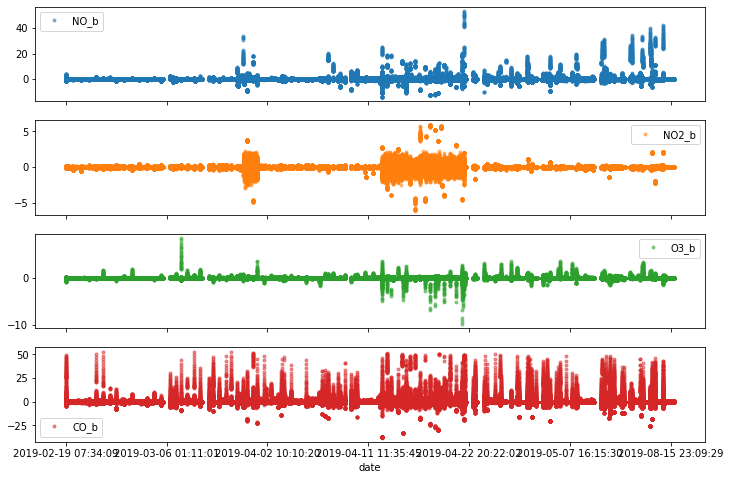

In [11]:
# plotting the variables after background compensations

def plot_pollutant_concentrations_b(df):
    
    cols_plot_b = ['NO_b', 'NO2_b', 'O3_b', 'CO_b']
    df.reset_index('group')[cols_plot_b].plot(marker='.', alpha=0.5, linestyle='None', subplots=True, legend=True, figsize=(12,8))
    
    my_path = SAVING_DIR
    my_file = 'background_compensated_pollutant_concentration_level.png'
    plt.savefig(os.path.join(my_path, my_file))
    
plot_pollutant_concentrations_b(df)

In [12]:
# dropping the raw variables (before background compensated)
df = df.drop(['NO', 'NO2', 'O3', 'CO'], axis=1)

In [14]:
# handling negative value using Polissar method
neg_v = lambda x: x[x>0].mean()/2
df['NO_p']=df[['NO_b']].groupby(level='group').transform(neg_v)
df['NO2_p']=df[['NO2_b']].groupby(level='group').transform(neg_v)
df['O3_p']=df[['O3_b']].groupby(level='group').transform(neg_v)
df['CO_p']=df[['CO_b']].groupby(level='group').transform(neg_v)

df['NO_s']=df[['NO_s']].groupby(level='group').transform(neg_v)
df['NO2_s']=df[['NO2_s']].groupby(level='group').transform(neg_v)
df['O3_s']=df[['O3_s']].groupby(level='group').transform(neg_v)
df['CO_s']=df[['CO_s']].groupby(level='group').transform(neg_v)


df.head(3)

,,spora-id,latitude,longitude,pressure,humidity,temp,NO_s,NO2_s,O3_s,CO_s,NO_b,NO2_b,O3_b,CO_b,NO_p,NO2_p,O3_p,CO_p
date,group,,,,,,,,,,,,,,,,,,
2019-02-19 07:34:09,0.0,2,60.184558,24.922632,100259.0,27.889,30.55,0.025742,0.047203,0.033457,0.109408,-1.044760,0.076608,-0.000790,-0.066464,0.734471,0.025169,0.019661,11.737139
2019-02-19 07:34:10,0.0,2,60.184562,24.922633,100259.0,27.886,30.56,0.025742,0.047203,0.033457,0.109408,-1.052160,0.070832,-0.000776,-0.066464,0.734471,0.025169,0.019661,11.737139
2019-02-19 07:34:11,0.0,2,60.184563,24.922632,100260.0,27.876,30.56,0.025742,0.047203,0.033457,0.109408,-1.052376,0.072656,-0.000739,-0.104386,0.734471,0.025169,0.019661,11.737139


In [15]:
# drop the varialves before negative value handling
df= df.drop(['NO_b', 'NO2_b', 'CO_b', 'O3_b'], axis=1)

print('percentage of negative value: \n', df[df<0].count()/len(df))

percentage of negative value: 
 spora-id     0.0
latitude     0.0
longitude    0.0
pressure     0.0
humidity     0.0
temp         0.0
NO_s         0.0
NO2_s        0.0
O3_s         0.0
CO_s         0.0
NO_p         0.0
NO2_p        0.0
O3_p         0.0
CO_p         0.0
dtype: float64


In [16]:
# renaming the column after all preprocessing
df.rename(columns={'NO_p':'NO', 'NO2_p':'NO2', 'O3_p':'O3', 'CO_p':'CO','pressure':'Pressure', 'humidity':'Humidity', 'temp':'Temperature'}, inplace=True)

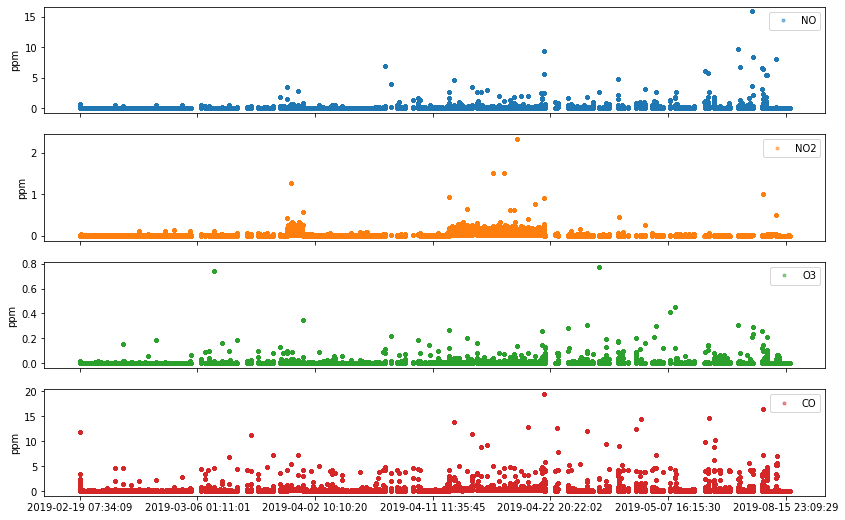

In [17]:
# plotting the variables after all processing

def pollutant_concentration_final_plot(df):
    cols_plot = ['NO', 'NO2', 'O3', 'CO']
    axes = df.reset_index('group')[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14,9), subplots=True)
    for ax in axes:
        ax.set_ylabel('ppm')
        ax.set_xlabel('')
        
    my_path = SAVING_DIR
    my_file = 'pollutant_concentration_level_final.png'
    plt.savefig(os.path.join(my_path, my_file))
    
pollutant_concentration_final_plot(df)

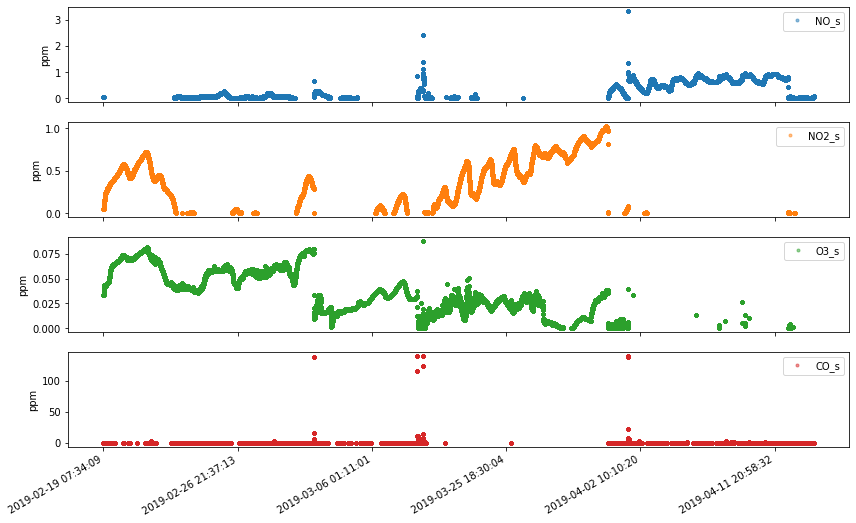

In [20]:
def pollutant_concentration_final_plot_spatial(df):
    cols_plot = ['NO_s', 'NO2_s', 'O3_s', 'CO_s']
    axes = df.reset_index('group')[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14,9), subplots=True)
    for ax in axes:
        ax.set_ylabel('ppm')
        ax.set_xlabel('')
        
    my_path = SAVING_DIR
    my_file = 'pollutant_concentration_level_final_spatial_data.png'
    plt.savefig(os.path.join(my_path, my_file))
    
pollutant_concentration_final_plot_spatial(df)

In [18]:
# Save the file after background compensation and negative value handling

DIR_TO_SAVE = r'C:\Users\Rabbil\Documents\BDA_thesis\thesis-project\data\processed'
csv_file_name ='background_negative_value_processed_data.csv'
csv_file_loc = os.path.join(DIR_TO_SAVE, csv_file_name)

# df to csv file
df.to_csv(csv_file_loc) # here index is used to avoid unwanted index-like column named unnamed:0 during reading csv file